In [ ]:
#DFS TICTACTOE
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board, player):
    # Check rows
    for row in board:
        if all(cell == player for cell in row):
            return True

    # Check columns
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True

    # Check diagonals
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True

    return False

def is_board_full(board):
    return all(all(cell != ' ' for cell in row) for row in board)

def dfs(board, player):
    if check_winner(board, 'X'):
        return 1
    elif check_winner(board, 'O'):
        return -1
    elif is_board_full(board):
        return 0

    scores = []
    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = player
                if player == 'X':
                    scores.append(dfs(board, 'O'))
                else:
                    scores.append(dfs(board, 'X'))
                board[i][j] = ' '  # Undo the move

    if player == 'X':
        return max(scores)
    else:
        return min(scores)

def make_best_move(board, player):
    best_score = float('-inf') if player == 'X' else float('inf')
    best_move = None

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = player
                score = dfs(board, 'O' if player == 'X' else 'X')
                board[i][j] = ' '  # Undo the move

                if player == 'X' and score > best_score:
                    best_score = score
                    best_move = (i, j)
                elif player == 'O' and score < best_score:
                    best_score = score
                    best_move = (i, j)

    return best_move

def play_tic_tac_toe():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    while True:
        print_board(board)

        if current_player == 'X':
            try:
                row = int(input("Enter your move (row): "))
                col = int(input("Enter your move (col): "))
            except ValueError:
                print("Invalid input! Please enter valid integers for row and col.")
                continue

            if 0 <= row < 3 and 0 <= col < 3 and board[row][col] == ' ':
                board[row][col] = 'X'
            else:
                print("Invalid move! Please enter a valid and unoccupied cell. Try again.")
                continue
        else:
            print("Computer's move:")
            row, col = make_best_move(board, 'O')
            board[row][col] = 'O'

        if check_winner(board, current_player):
            print_board(board)
            print(f"{current_player} wins!")
            break
        elif is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break

        current_player = 'O' if current_player == 'X' else 'X'

if __name__ == "__main__":
    play_tic_tac_toe()


In [ ]:
#ALPHABETA_ EXP2


def print_board(board):
    for row in board:
        print(" ".join(row))
    print()

def is_winner(board, player):
    # Check rows, columns, and diagonals for a win
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or \
           all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or \
       all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_board_full(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

def minimax(board, depth, alpha, beta, maximizing_player):
    if is_winner(board, 'X'):
        return -1
    elif is_winner(board, 'O'):
        return 1
    elif is_board_full(board):
        return 0

    if maximizing_player:
        max_eval = float('-inf')
        for i, j in get_empty_cells(board):
            board[i][j] = 'O'
            eval = minimax(board, depth + 1, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            board[i][j] = ' '
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for i, j in get_empty_cells(board):
            board[i][j] = 'X'
            eval = minimax(board, depth + 1, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            board[i][j] = ' '
            if beta <= alpha:
                break
        return min_eval

def find_best_move(board):
    best_val = float('-inf')
    best_move = None
    for i, j in get_empty_cells(board):
        board[i][j] = 'O'
        move_val = minimax(board, 0, float('-inf'), float('inf'), False)
        board[i][j] = ' '
        if move_val > best_val:
            best_move = (i, j)
            best_val = move_val
    return best_move

def play_tic_tac_toe():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    while not is_winner(board, 'X') and not is_winner(board, 'O') and not is_board_full(board):
        print_board(board)
        row, col = map(int, input("Enter your move (row and column separated by space): ").split())
        if board[row][col] == ' ':
            board[row][col] = 'X'
        else:
            print("Invalid move. Try again.")
            continue

        if is_winner(board, 'X'):
            print_board(board)
            print("You win!")
            break
        elif is_board_full(board):
            print_board(board)
            print("It's a draw!")
            break

        print("Computer's move:")
        comp_row, comp_col = find_best_move(board)
        board[comp_row][comp_col] = 'O'

        if is_winner(board, 'O'):
            print_board(board)
            print("Computer wins!")
            break
        elif is_board_full(board):
            print_board(board)
            print("It's a draw!")
            break

if __name__ == "__main__":
    play_tic_tac_toe()


In [ ]:
import numpy as np
from queue import PriorityQueue

class State:
    def __init__(self, state, parent):
        self.state = state
        self.parent = parent

    def __lt__(self, other):
        return False  # Define a default comparison method

class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state


    def print_state(self, state):
        print(state[:, :])

    def is_goal(self, state):
        return np.array_equal(state, self.goal_state)

    def get_possible_moves(self, state):
        possible_moves = []
        zero_pos = np.where(state == 0)
        directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Left, Right, Up, Down
        for direction in directions:
            new_pos = (zero_pos[0] + direction[0], zero_pos[1] + direction[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:  # Check boundaries
                new_state = np.copy(state)
                new_state[zero_pos], new_state[new_pos] = new_state[new_pos], new_state[zero_pos]  # Swap
                possible_moves.append(new_state)
        return possible_moves

    def heuristic(self, state):
         return np.count_nonzero(state != self.goal_state)


    def solve(self):
        queue = PriorityQueue()
        initial_state = State(self.initial_state, None)
        queue.put((0, initial_state))  # Put State object in queue
        visited = set()

        while not queue.empty():
            priority, current_state = queue.get()
            if self.is_goal(current_state.state):
                return current_state  # Return final state
            for move in self.get_possible_moves(current_state.state):
                move_state = State(move, current_state)  # Create new State for move
                if str(move_state.state) not in visited:
                    visited.add(str(move_state.state))
                    priority = self.heuristic(move_state.state)
                    queue.put((priority, move_state))  # Put State object in queue
        return None

# Test the function
initial_state = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])
goal_state = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])
puzzle = Puzzle(initial_state, goal_state)
solution = puzzle.solve()
if solution is not None:
    moves = []
    while solution is not None:  # Go through parents to get moves
        moves.append(solution.state)
        solution = solution.parent
    for move in reversed(moves):  # Print moves in correct order
        puzzle.print_state(move)
else:
    print("No solution found.")

[[2 8 1]
 [0 4 3]
 [7 6 5]]
[[2 8 1]
 [4 0 3]
 [7 6 5]]
[[2 0 1]
 [4 8 3]
 [7 6 5]]
[[2 1 0]
 [4 8 3]
 [7 6 5]]
[[2 1 3]
 [4 8 0]
 [7 6 5]]
[[2 1 3]
 [4 0 8]
 [7 6 5]]
[[2 1 3]
 [0 4 8]
 [7 6 5]]
[[0 1 3]
 [2 4 8]
 [7 6 5]]
[[1 0 3]
 [2 4 8]
 [7 6 5]]
[[1 4 3]
 [2 0 8]
 [7 6 5]]
[[1 4 3]
 [2 8 0]
 [7 6 5]]
[[1 4 0]
 [2 8 3]
 [7 6 5]]
[[1 0 4]
 [2 8 3]
 [7 6 5]]
[[1 8 4]
 [2 0 3]
 [7 6 5]]
[[1 8 4]
 [2 3 0]
 [7 6 5]]
[[1 8 0]
 [2 3 4]
 [7 6 5]]
[[1 0 8]
 [2 3 4]
 [7 6 5]]
[[1 3 8]
 [2 0 4]
 [7 6 5]]
[[1 3 8]
 [0 2 4]
 [7 6 5]]
[[0 3 8]
 [1 2 4]
 [7 6 5]]
[[3 0 8]
 [1 2 4]
 [7 6 5]]
[[3 8 0]
 [1 2 4]
 [7 6 5]]
[[3 8 4]
 [1 2 0]
 [7 6 5]]
[[3 8 4]
 [1 0 2]
 [7 6 5]]
[[3 0 4]
 [1 8 2]
 [7 6 5]]
[[0 3 4]
 [1 8 2]
 [7 6 5]]
[[1 3 4]
 [0 8 2]
 [7 6 5]]
[[1 3 4]
 [8 0 2]
 [7 6 5]]
[[1 3 4]
 [8 2 0]
 [7 6 5]]
[[1 3 0]
 [8 2 4]
 [7 6 5]]
[[1 0 3]
 [8 2 4]
 [7 6 5]]
[[1 2 3]
 [8 0 4]
 [7 6 5]]


In [ ]:
#hillclimb
import random

def choose_initial_solution():
    return random.uniform(-10, 10)

def evaluate_objective_function(solution):
    return solution**2

def generate_neighbors(solution):
    return [solution + random.uniform(-1, 1) for _ in range(5)]

def select_best_neighbor(neighbors):
    return max(neighbors, key=evaluate_objective_function)

max_iterations, no_improvement_threshold, objective_threshold = 100, 10, -90

initial_solution = choose_initial_solution()
current_solution, current_value, no_improvement_count = initial_solution, evaluate_objective_function(initial_solution), 0

for _ in range(max_iterations):
    neighbors = generate_neighbors(current_solution)
    best_neighbor, best_value = select_best_neighbor(neighbors), evaluate_objective_function(select_best_neighbor(neighbors))

    if best_value > current_value:
        current_solution, current_value, no_improvement_count = best_neighbor, best_value, 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= no_improvement_threshold or current_value >= objective_threshold:
        termination_reason = "No improvement" if no_improvement_count >= no_improvement_threshold else "Objective threshold"
        print(f"Terminating due to {termination_reason}.")
        break

print("Initial Solution:", initial_solution)
print("Best Solution:", current_solution)
print("Objective Value:", current_value)


Terminating due to Objective threshold.
Initial Solution: 0.8519057098140195
Best Solution: 1.2574341343619413
Objective Value: 1.5811406022585646


Accuracy: 0.9667


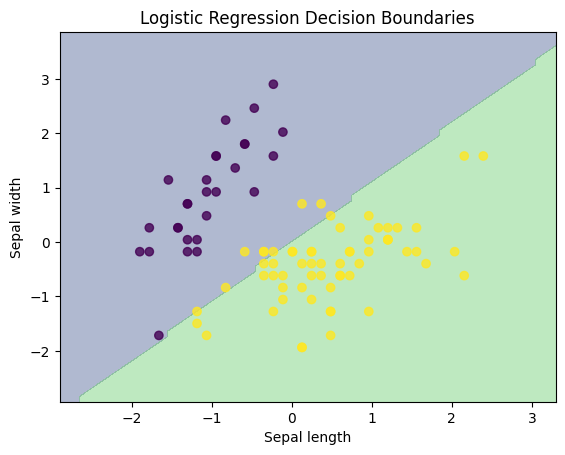

Number of features: 2
Number of instances: 150
Number of numerical data: 2
Number of categorical data: 0
Name of target variable: Species


In [ ]:
#logistic Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def logistic_regression(X, y, num_iterations, learning_rate):
    weights = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient_val = gradient(X, h, y)
        weights -= learning_rate * gradient_val

    return weights

def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)) > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title('Logistic Regression Decision Boundaries')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
sc = StandardScaler()
X_train_std, X_test_std = sc.fit_transform(X_train), sc.transform(X_test)
weights = logistic_regression(X_train_std, y_train, num_iterations=200, learning_rate=0.1)

y_pred = sigmoid(np.dot(X_test_std, weights)) > 0.5
print('Accuracy: %.4f' % np.mean(y_pred == y_test))
plot_decision_boundary(X_train_std, y_train, weights)

#(For Lab record purpose)
# Number of features
num_features = X.shape[1]
print("Number of features:", num_features)

# Number of instances
num_instances = X.shape[0]
print("Number of instances:", num_instances)

# Number of numerical data (assuming all features are numerical)
num_numerical_data = num_features
print("Number of numerical data:", num_numerical_data)

# Number of categorical data (assuming there are no categorical features)
num_categorical_data = 0
print("Number of categorical data:", num_categorical_data)

# Name of target variable
target_variable_name = "Species"  # Assuming the target variable is called "Species" in the Iris dataset
print("Name of target variable:", target_variable_name)



In [ ]:
#naive bayes classifiers

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Create a Naive Bayes Classifier
nb = NaiveBayes()

# Train the model using the training sets
nb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = nb.predict(X_test)

# Print class names instead of class numbers
print("Predictions:", class_names[y_pred])





#(For Lab record purpose)

# Number of features
num_features = iris.data.shape[1]
print("Number of features:", num_features)

# Number of instances
num_instances = iris.data.shape[0]
print("Number of instances:", num_instances)

# Number of numerical data
num_numerical_data = num_features
print("Number of numerical data:", num_numerical_data)

# Number of categorical data (assuming all features are numerical)
num_categorical_data = 0
print("Number of categorical data:", num_categorical_data)

# Name of target variable
target_variable_name = "Species"  # Assuming the target variable is called "Species" in the Iris dataset
print("Name of target variable:", target_variable_name)

Predictions: ['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'versicolor']
Number of features: 4
Number of instances: 150
Number of numerical data: 4
Number of categorical data: 0
Name of target variable: Species


In [ ]:
#KNN lab 7



from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

    print("Classification Accuracy :" , classifier.score(x_test,y_test));

#(For Lab record purpose)

# Number of features
num_features = iris.data.shape[1]
print("Number of features:", num_features)

# Number of instances
num_instances = iris.data.shape[0]
print("Number of instances:", num_instances)

# Number of numerical data
num_numerical_data = num_features
print("Number of numerical data:", num_numerical_data)

# Number of categorical data (assuming all features are numerical)
num_categorical_data = 0
print("Number of categorical data:", num_categorical_data)

# Name of target variable
target_variable_name = "Species"  # Assuming the target variable is called "Species" in the Iris dataset
print("Name of target variable:", target_variable_name)


Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [4.8 3.4 1.9 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.8666666666666667
 Sample: [5.4 3.7 1.5 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.8666666666666667
 Sample: [5.7 2.8 4.5 1.3]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.8666666666666667
 Sample: [5.5 2.5 4.  1.3]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.8666666666666667
 Sample: [6.8 2.8 4.8 1.4]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.8666666666666667
 Sample: [6.7 3.  5.  1.7]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.8666666666666667
 Sample: [7.2 3.2 6.  1.8]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667
 Sample: [5.6 3.  4.5 1.5]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.8666666666666667

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


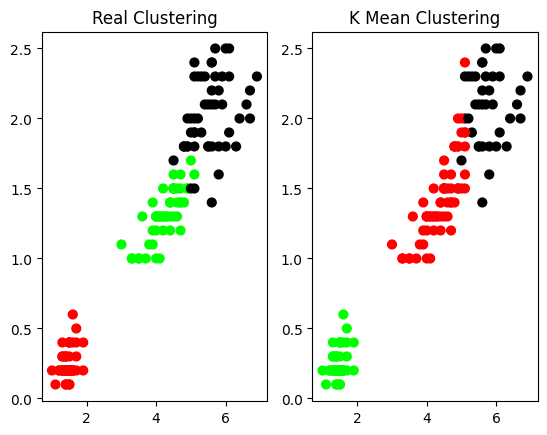

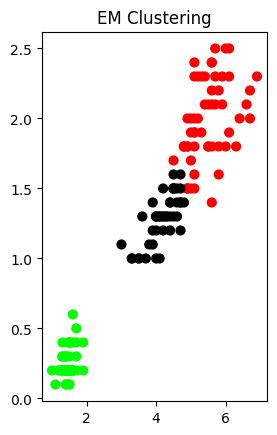

Number of features: 4
Number of instances: 150
Number of numerical data: 4
Number of categorical data: 0
Name of target variable: Species


In [ ]:
#k-Means algorithm.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y = pd.DataFrame(iris.target)
Y.columns = ['Targets']

print(X)
print(Y)
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Targets], s=40)
plt.title('Real Clustering')

model1 = KMeans(n_clusters=3)
model1.fit(X)

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model1.labels_], s=40)
plt.title('K Mean Clustering')
plt.show()

model2 = GaussianMixture(n_components=3)
model2.fit(X)

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model2.predict(X)], s=40)
plt.title('EM Clustering')
plt.show()

"""
print("Actual Target is:\n", iris.target)
print("K Means:\n",model1.labels_)
print("EM:\n",model2.predict(X))
print("ARI of KMeans is ", sm.adjusted_rand_score(Y.values.flatten(), model1.labels_))
print("ARI of EM is ", sm.adjusted_rand_score(Y.values.flatten(), model2.predict(X)))
print("NMI of KMeans is ", sm.normalized_mutual_info_score(Y.values.flatten(), model1.labels_))
print("NMI of EM is ", sm.normalized_mutual_info_score(Y.values.flatten(), model2.predict(X)))
"""
#(For Lab record purpose)

# Number of features
num_features = iris.data.shape[1]
print("Number of features:", num_features)

# Number of instances
num_instances = iris.data.shape[0]
print("Number of instances:", num_instances)

# Number of numerical data
num_numerical_data = num_features
print("Number of numerical data:", num_numerical_data)

# Number of categorical data (assuming all features are numerical)
num_categorical_data = 0
print("Number of categorical data:", num_categorical_data)

# Name of target variable
target_variable_name = "Species"  # Assuming the target variable is called "Species" in the Iris dataset
print("Name of target variable:", target_variable_name)
